In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
gen_plus = np.loadtxt("AllData") # Output file from coupling with genBC
gen_t = gen_plus[:, 1]
gen_press = (gen_plus[:, 0] + gen_plus[:, 3])
gen_flow = gen_plus[:, 2]

sv0 = np.loadtxt("svZeroD_data", skiprows=1) # Output file from coupling with sv0DSolver
sv_t = sv0[:, 0]
sv_press = sv0[:, 2]
sv_flow = sv0[:, 1]

In [7]:
def integrate_rcr(tsteps, Q):
    dt = tsteps[1]-tsteps[0]
    Rp = 121.0 
    Rd = 1212.0
    C = 1.5e-4
    Pd = 0.0
    R_vessel = 0.19 # R = 8*0.04*30/(pi*2^4)

    num_tsteps_int = len(Q)
    Pc_int = np.zeros(num_tsteps_int)
    tsteps_int = np.zeros_like(Pc_int)
    P_in_int = np.zeros_like(Pc_int)
    for i in range(num_tsteps_int-1):
        Pc_int[i+1] = (Pc_int[i] + (dt/C)*Q[(i+1)%len(Q)] + (dt/C/Rd)*Pd)/(1.0 + (dt/C/Rd))
        tsteps_int[i+1] = dt*(i+1)
        P_in_int[i+1] = Pc_int[i+1] + Rp*Q[(i+1)%len(Q)]
    
    return tsteps_int, P_in_int, Pc_int

# Compare 3D with semi-analytical solution ------------------------
itime_sv, ipress_sv, ipc_sv = integrate_rcr(sv_t, sv_flow)

itime_gen, ipress_gen, ipc_gen = integrate_rcr(gen_t, gen_flow)

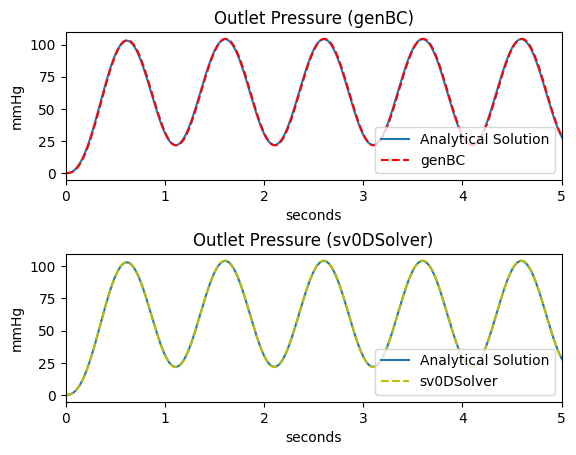

In [8]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
ax[0].plot(itime_gen, ipress_gen/1333.3,)
ax[0].plot(gen_t, gen_press/1333.3, '--r')
ax[0].legend(['Analytical Solution', 'genBC'])
ax[0].set_title("Outlet Pressure (genBC)")
ax[0].set_ylabel("mmHg")
ax[0].set_xlabel("seconds")
ax[0].set_xlim((0,5))

ax[1].plot(itime_sv, ipress_sv/1333.3,)
ax[1].plot(sv_t, sv_press/1333.3, '--y')
ax[1].legend(['Analytical Solution', 'sv0DSolver'])
ax[1].set_title("Outlet Pressure (sv0DSolver)")
ax[1].set_ylabel("mmHg")
ax[1].set_xlabel("seconds")
ax[1].set_xlim((0,5))
plt.show()

In [9]:
error = np.abs((gen_press - ipress_gen))/1333.3
mean_error = np.mean(np.sqrt(error**2))
max_error = np.max(error)
min_error = np.min(error)
med_error = np.median(error)

print("\nSemi-analytical vs svFSI+ genBC (in mmHg)")
print("\tRoot mean squared error:", mean_error)
print("\tMax absolute error:", max_error)
print("\tMin absolute error:", min_error)
print("\tMedian absolute error:", med_error)

error = np.abs((sv_press - ipress_sv))/1333.3
mean_error = np.mean(np.sqrt(error**2))
max_error = np.max(error)
min_error = np.min(error)
med_error = np.median(error)

print("\nSemi-analytical vs svFSI+ sv0DSolver (in mmHg)")
print("\tRoot mean squared error:", mean_error)
print("\tMax absolute error:", max_error)
print("\tMin absolute error:", min_error)
print("\tMedian absolute error:", med_error)


Semi-analytical vs svFSI+ genBC (in mmHg)
	Root mean squared error: 0.27432904617767667
	Max absolute error: 0.46586876411313555
	Min absolute error: 0.0006266755930705394
	Median absolute error: 0.29760993853203666

Semi-analytical vs svFSI+ sv0DSolver (in mmHg)
	Root mean squared error: 0.2743154647001451
	Max absolute error: 0.4659451038911528
	Min absolute error: 0.0005631083721610342
	Median absolute error: 0.2976412189303046
